In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True, as_frame=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
print('The size of training data is :{} \n The size of test data is :{}'.format(len(X_train),len(X_test)))

The size of training data is :120 
 The size of test data is :30


In [ ]:
y_train.value_counts()

target
0    42
1    39
2    39
Name: count, dtype: int64

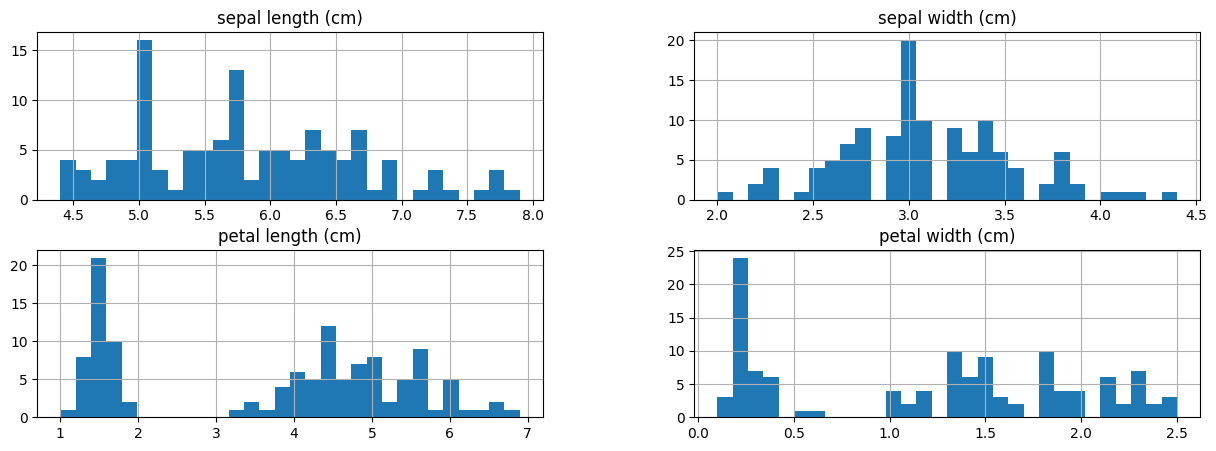

In [ ]:
X_train.hist(bins=30,figsize=(15,5))
plt.show()

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

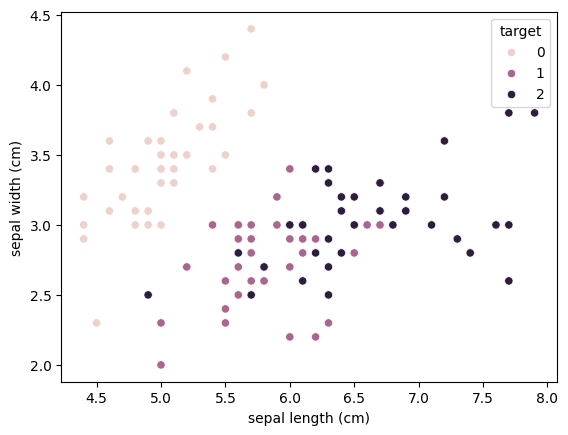

In [ ]:
sns.scatterplot(data=X_train,x='sepal length (cm)',y='sepal width (cm)',hue=y_train)

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

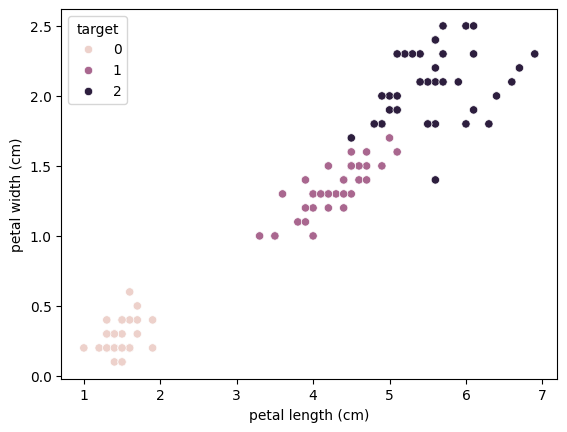

In [ ]:
sns.scatterplot(data=X_train,x='petal length (cm)',y='petal width (cm)',hue=y_train)

In [ ]:
X_train.max()

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scale_pipe = Pipeline([('scaler',StandardScaler())])

X_train_scaled = scale_pipe.fit_transform(X_train)

In [ ]:
from sklearn.svm import LinearSVC, SVC
lin_SVC = LinearSVC()
lin_SVC.fit(X_train_scaled,y_train)

LinearSVC()

In [ ]:
poly_SVC = SVC(kernel='poly')
poly_SVC.fit(X_train_scaled,y_train)

SVC(kernel='poly')

In [ ]:
from sklearn.metrics import accuracy_score
lin_pred = lin_SVC.predict(X_train_scaled)

accuracy_score(y_train,lin_pred)


0.975

In [ ]:
poly_pred = poly_SVC.predict(X_train_scaled)
accuracy_score(y_train,poly_pred)

0.9416666666666667

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_train,poly_pred))
print(classification_report(y_train,poly_pred))

[[42  0  0]
 [ 0 39  0]
 [ 0  7 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.85      1.00      0.92        39
           2       1.00      0.82      0.90        39

    accuracy                           0.94       120
   macro avg       0.95      0.94      0.94       120
weighted avg       0.95      0.94      0.94       120

